In [35]:
import pandas as pd
import seaborn as sb
import matplotlib as plt
df=pd.read_csv('spotify_songs.csv')

In [5]:
df.head()


,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32833 non-null  object 
 1   track_name                32828 non-null  object 
 2   track_artist              32828 non-null  object 
 3   track_popularity          32833 non-null  int64  
 4   track_album_id            32833 non-null  object 
 5   track_album_name          32828 non-null  object 
 6   track_album_release_date  32833 non-null  object 
 7   playlist_name             32833 non-null  object 
 8   playlist_id               32833 non-null  object 
 9   playlist_genre            32833 non-null  object 
 10  playlist_subgenre         32833 non-null  object 
 11  danceability              32833 non-null  float64
 12  energy                    32833 non-null  float64
 13  key                       32833 non-null  int64  
 14  loudne

<AxesSubplot:xlabel='track_popularity', ylabel='Count'>

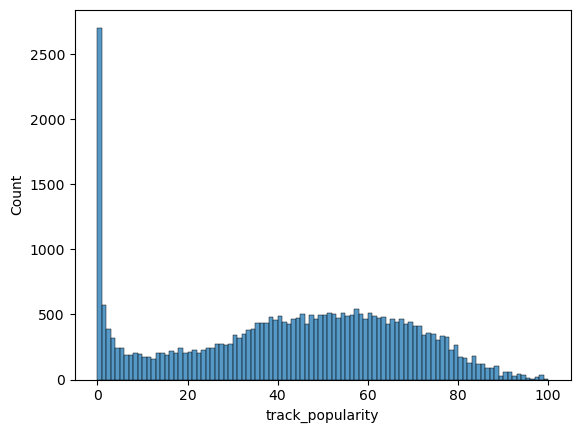

In [9]:
sb.histplot(data=df, x="track_popularity", bins =100)


<AxesSubplot:xlabel='track_popularity'>

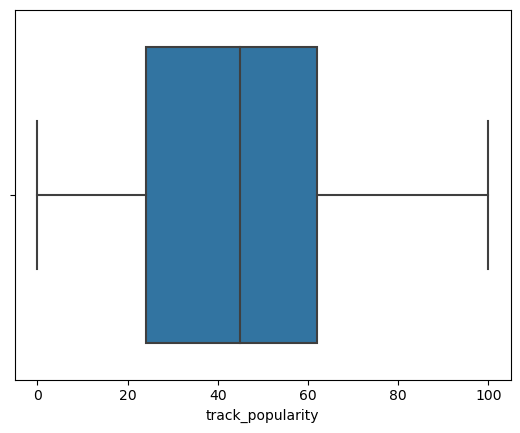

In [10]:
sb.boxplot(data=df, x="track_popularity")

In [14]:
tmx=df['track_popularity'].max()
tmn=df['track_popularity'].min()
quart=df['track_popularity'].quantile(.25)
med=df['track_popularity'].quantile(.5)
highquart=df['track_popularity'].quantile(.75)

summary={"Min":tmn, "first quartile":quart, "median":med, "third quartile":highquart, "Max":tmx}
print(summary)

{'Min': 0, 'first quartile': 24.0, 'median': 45.0, 'third quartile': 62.0, 'Max': 100}


#### The distribution of track popularity seems to be roughly symetric. There is an unusual spike though at popularity=0. The median is 45 and the IQR is 38. 
##### As evidenced by the boxplot and histogram, it is evident that the majority of the songs were of a lower popularity. Furthermore since the median is 45 which is less than half the highest possible score, the majority of songs are on the less popular side. This suggests the data can be slightly skewed right, although it appears roughly symetric.

In [10]:
def meancalc(column):
    tot=0
    for num in df[column]:
        tot+=num
    mean=(tot/len(df))
    return mean



In [31]:
tmpoavg=meancalc('tempo')
print(f"the average tempo score is {tmpoavg}")

the average tempo score is 120.88113154448297


In [11]:
def standard_deviation(column):
    dev=df[column].std()
    return dev
dancestd=standard_deviation('danceability')

In [40]:
dancemean=meancalc('danceability')

In [43]:
highst=dancemean+dancestd
lowst=dancemean-dancestd
print(highst, lowst)

0.7999348407473437 0.5097641998520415


<AxesSubplot:xlabel='energy', ylabel='Count'>

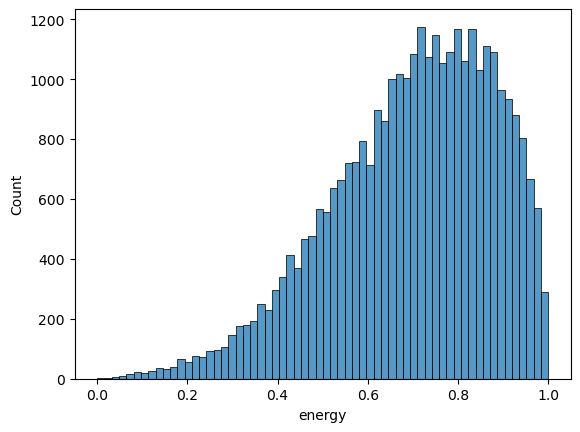

In [45]:
sb.histplot(data=df, x='energy')

In [8]:
maxcount=0
for i in df['track_popularity']:
    if i==100:
        maxcount+=1
print((maxcount/len(df))*100)
print(maxcount)

0.0060914324003289375
2


If a song has a popularity score of 100 it is very impressive. Less than 1% of songs have that popularity score. In addition to this by looking at the histogram you can clearly see how little songs actually make it to pop score of 100.

what is the standard deviation of song valence?

<AxesSubplot:xlabel='valence', ylabel='Count'>

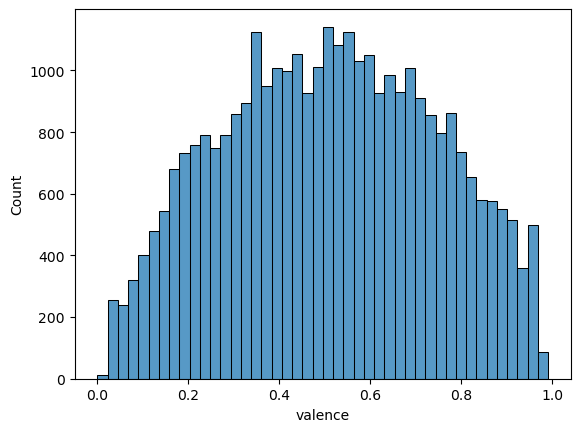

In [18]:
sb.histplot(data=df, x='valence')

In [13]:
valencemean=meancalc('valence')
print(valencemean)

0.510560973715467


In [15]:
valencesd=standard_deviation('valence')
print(valencesd)

0.23314597436951356


The standard deviation of the song valence is .2331459. This can be considered an accurate way to understand the graph due to how the graph of song valence is fairly normal.

In [24]:
def histoverlay(bottom, top, x, bins, color='blue'):
    sb.histplot(data=bottom, x=x, bins=bins, color="orange")
    sb.histplot(data=top, x=x, bins=bins)

In [39]:
df_pop=df[df['playlist_genre']=='pop']
df_rap=df[df['playlist_genre']=='rap']

<AxesSubplot:xlabel='speechiness', ylabel='Count'>

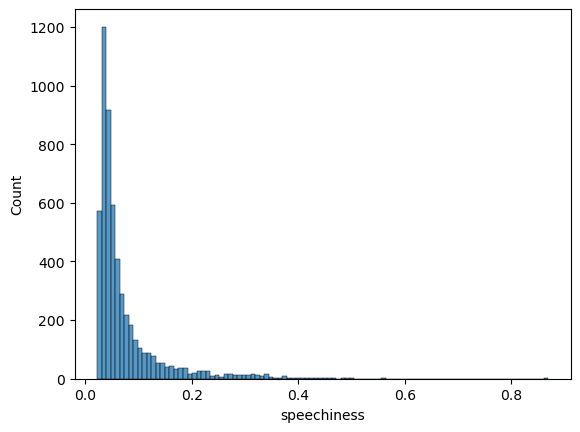

In [44]:
sb.histplot(data=df_pop, x='speechiness', bins=100)

<AxesSubplot:xlabel='speechiness', ylabel='Count'>

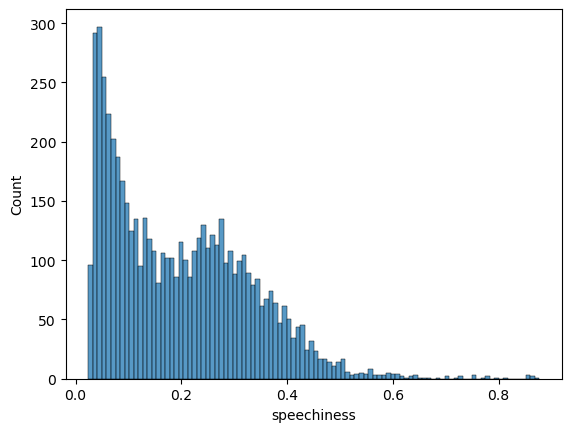

In [45]:
sb.histplot(data=df_rap, x='speechiness', bins=100)

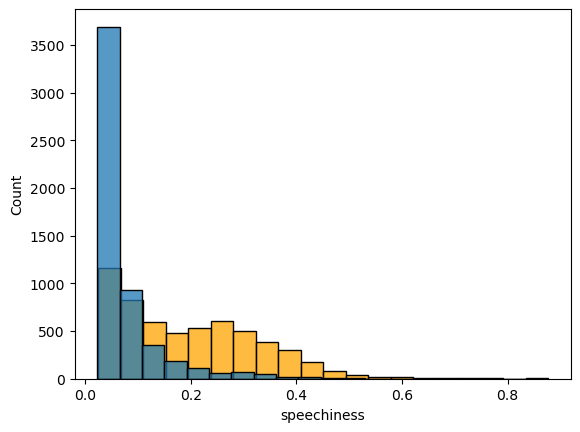

In [46]:
histoverlay(df_rap, df_pop, x='speechiness', bins=20)